In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import holidays

In [9]:
# 1. Data Loading and Initial Inspection
df = pd.read_csv('../data/synthetic_sales_data.csv', parse_dates=['Date'])

In [10]:
df.set_index('Date', inplace=True)
df.head()


,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales
Date,,,,,,,,
2021-01-01,1,supermarket,1,0,0,0,124,0
2021-01-02,1,pharmacy,1,0,0,0,87,0
2021-01-03,1,supermarket,1,1,0,0,74,778
2021-01-04,1,supermarket,0,1,0,0,0,0
2021-01-05,1,pharmacy,1,1,0,0,76,1002


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10950 entries, 2021-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store           10950 non-null  int64 
 1   Store_Type      10950 non-null  object
 2   Store_Status    10950 non-null  int64 
 3   Promo           10950 non-null  int64 
 4   Promo2          10950 non-null  int64 
 5   School_Holiday  10950 non-null  int64 
 6   Customers       10950 non-null  int64 
 7   Sales           10950 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 769.9+ KB
None


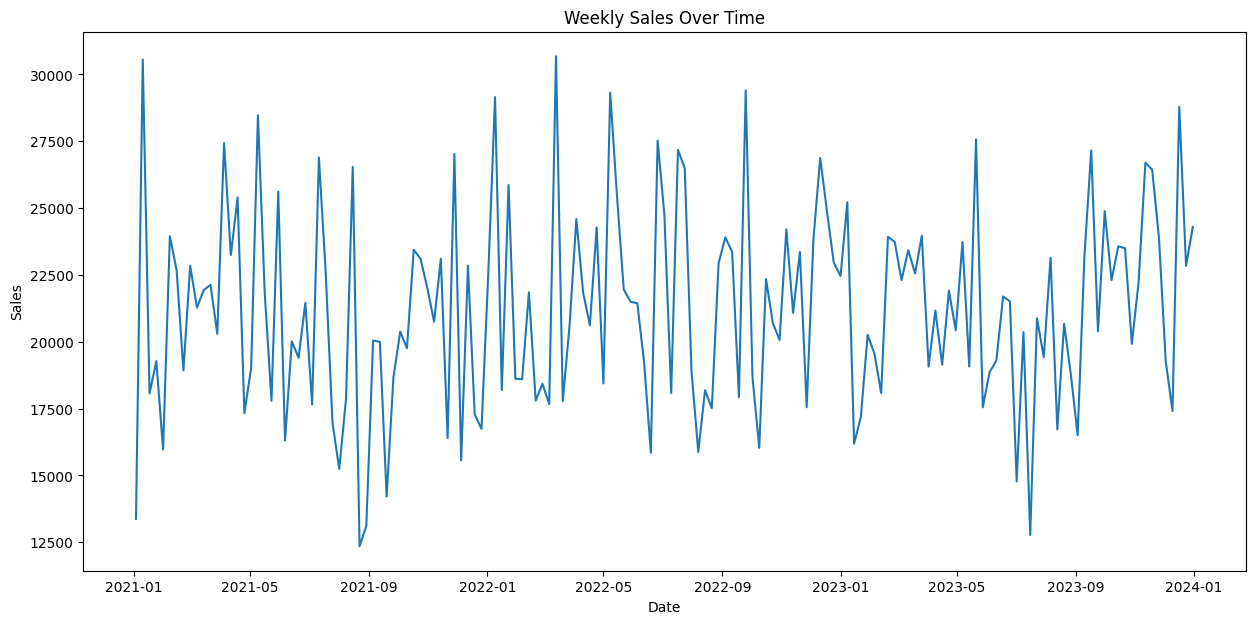

In [12]:
# Create a temporary variable for weekly sales without modifying df
weekly_sales = df['Sales'].resample('W').sum()

# Time series plot of weekly sales
plt.figure(figsize=(15, 7))
plt.plot(weekly_sales.index, weekly_sales)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


C:\Users\Yidnekachew\AppData\Local\Temp\ipykernel_13168\2546415302.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


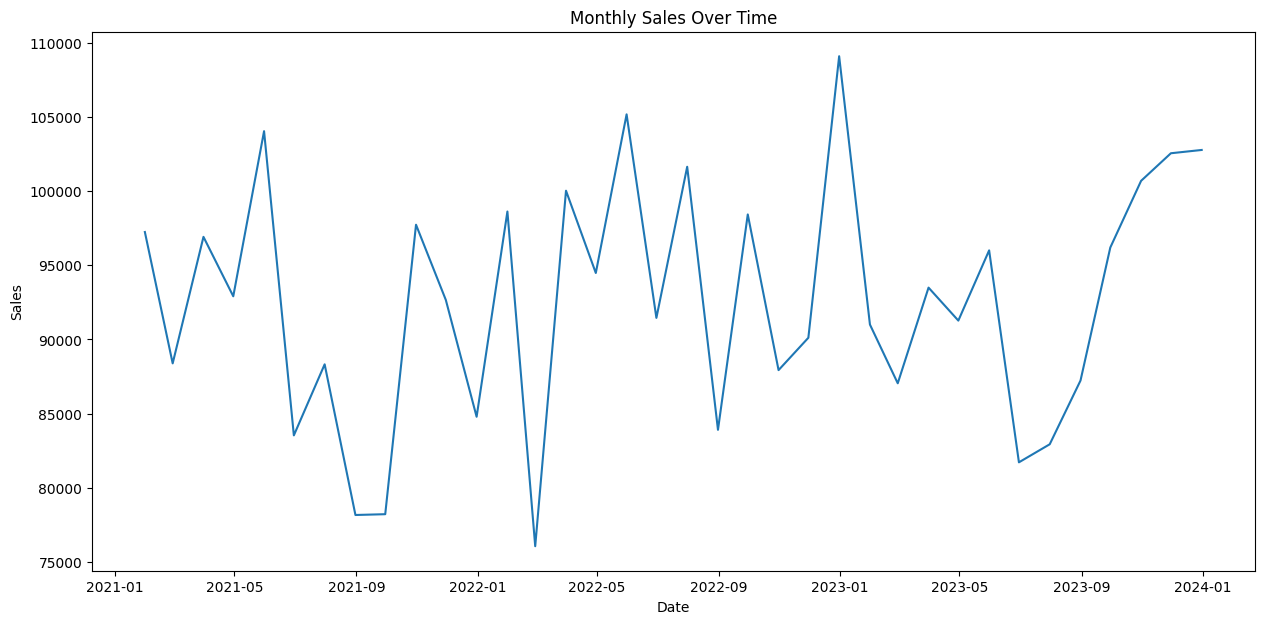

In [13]:
# Resample to monthly data for clearer trends
monthly_sales = df['Sales'].resample('M').sum()
# Monthly sales plot
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


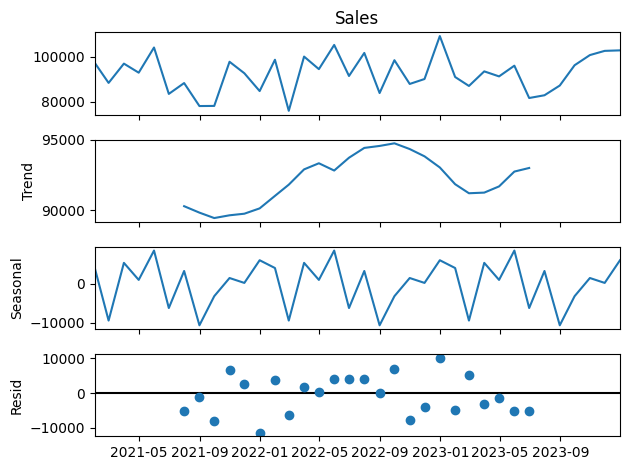

In [14]:

# 3. Seasonal Decomposition
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.tight_layout()
plt.show()

In [15]:
print(len(monthly_sales))

36


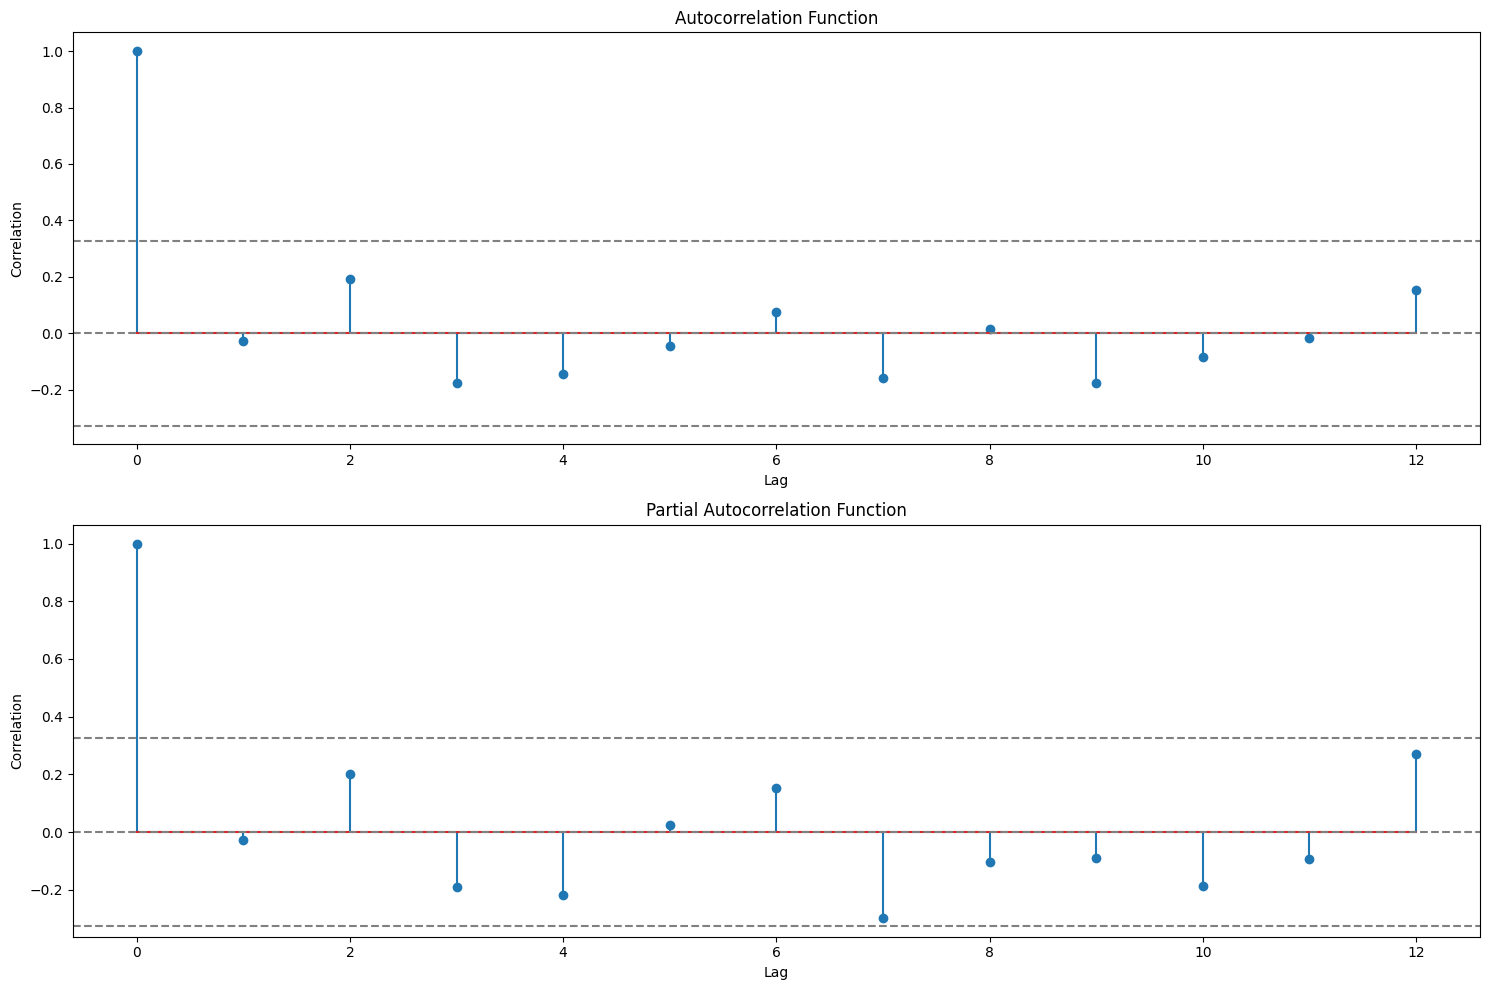

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

# Determine number of lags (use 1/3 of data length)
n_lags = len(monthly_sales) // 3  # This will be 12

# Calculate ACF and PACF
acf_values = acf(monthly_sales.dropna(), nlags=n_lags)
pacf_values = pacf(monthly_sales.dropna(), nlags=n_lags)

# Plot ACF and PACF using stem plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot ACF
ax1.stem(range(len(acf_values)), acf_values)  # Remove use_line_collection
ax1.axhline(y=0, linestyle='--', color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='gray')
ax1.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='gray')
ax1.set_title('Autocorrelation Function')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Correlation')

# Plot PACF
ax2.stem(range(len(pacf_values)), pacf_values)  # Remove use_line_collection
ax2.axhline(y=0, linestyle='--', color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='gray')
ax2.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='gray')
ax2.set_title('Partial Autocorrelation Function')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Correlation')



plt.tight_layout()
plt.show()


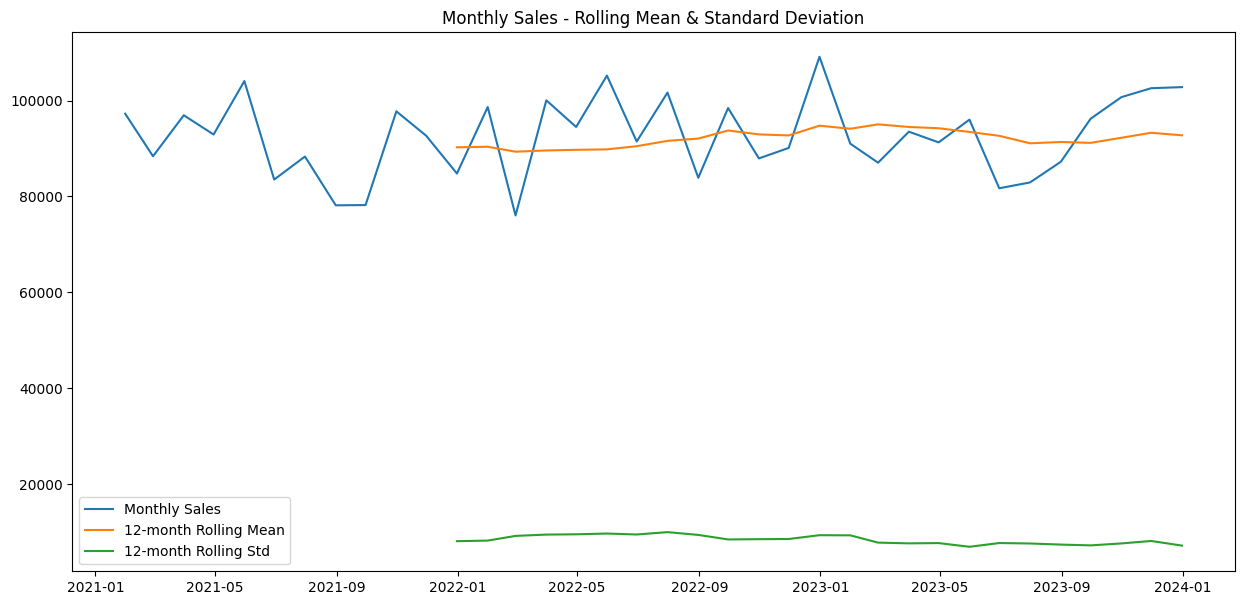

In [20]:
# 5. Rolling statistics
rolling_mean = monthly_sales.rolling(window=12).mean()
rolling_std = monthly_sales.rolling(window=12).std()

plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales')
plt.plot(rolling_mean.index, rolling_mean, label='12-month Rolling Mean')
plt.plot(rolling_std.index, rolling_std, label='12-month Rolling Std')
plt.legend()
plt.title('Monthly Sales - Rolling Mean & Standard Deviation')
plt.show()

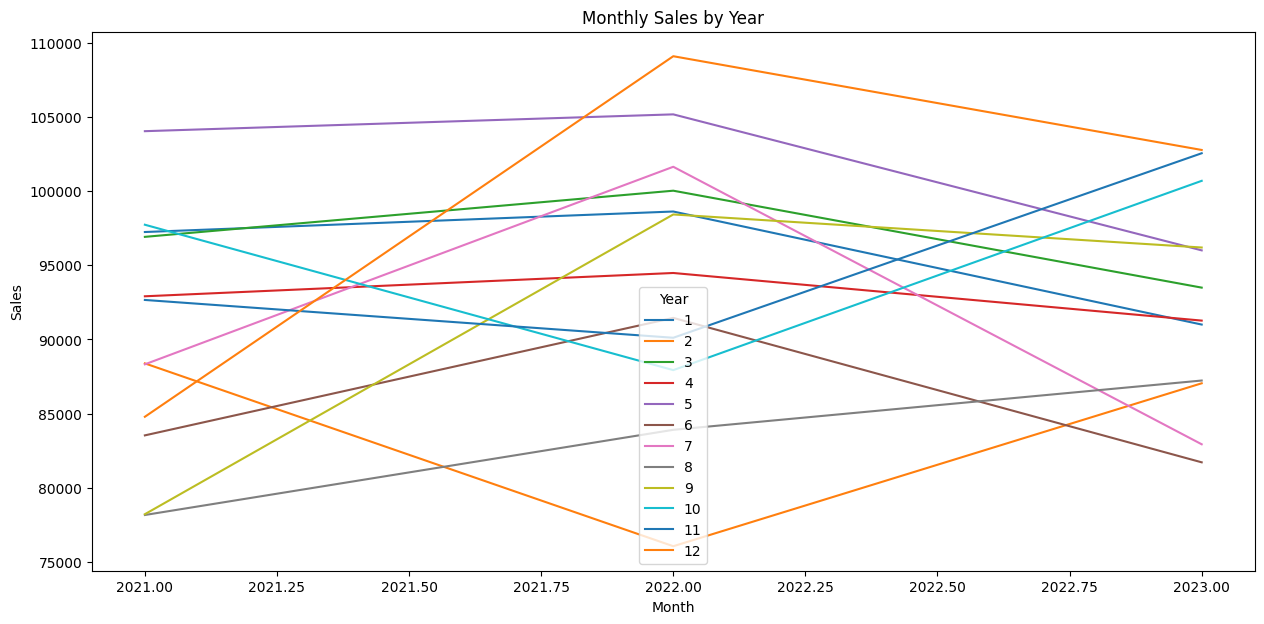

In [21]:
# 6. Year-over-Year comparison
df['Year'] = df.index.year
df['Month'] = df.index.month

yearly_monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
yearly_monthly_sales.plot(figsize=(15, 7))
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

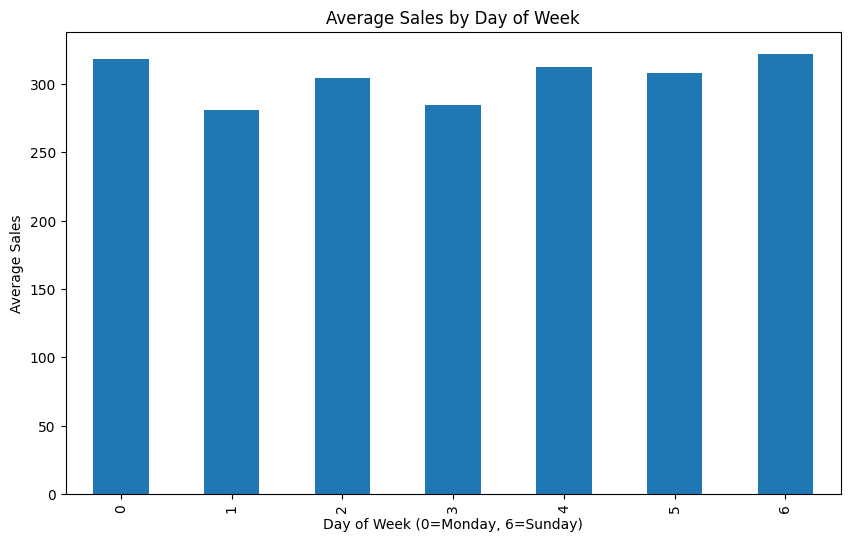

In [22]:
# 7. Day of week patterns
df['DayOfWeek'] = df.index.dayofweek
day_of_week_sales = df.groupby('DayOfWeek')['Sales'].mean()
day_of_week_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()

In [23]:
# Create is_holiday column using the holidays library (using US holidays as an example)
us_holidays = holidays.US()  # Change to the appropriate country if needed

# Function to check if a date is a holiday
def is_holiday(date):
    return date in us_holidays

# Apply the function to create the is_holiday column
df['is_holiday'] = df.index.to_series().apply(is_holiday).astype(int)

In [24]:
df

,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,Year,Month,DayOfWeek,is_holiday
Date,,,,,,,,,,,,
2021-01-01,1,supermarket,1,0,0,0,124,0,2021,1,4,1
2021-01-02,1,pharmacy,1,0,0,0,87,0,2021,1,5,0
2021-01-03,1,supermarket,1,1,0,0,74,778,2021,1,6,0
2021-01-04,1,supermarket,0,1,0,0,0,0,2021,1,0,0
2021-01-05,1,pharmacy,1,1,0,0,76,1002,2021,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,10,pharmacy,1,0,1,0,112,28,2023,12,2,0
2023-12-28,10,convenience,1,0,0,0,111,55,2023,12,3,0
2023-12-29,10,convenience,1,0,0,0,99,0,2023,12,4,0


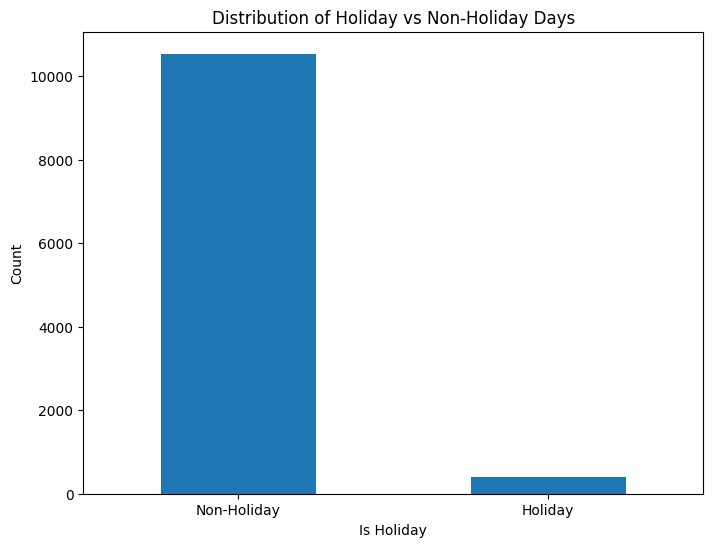

In [25]:

# Visualize distribution of is_holiday
plt.figure(figsize=(8, 6))
df['is_holiday'].value_counts().plot(kind='bar')
plt.title('Distribution of Holiday vs Non-Holiday Days')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


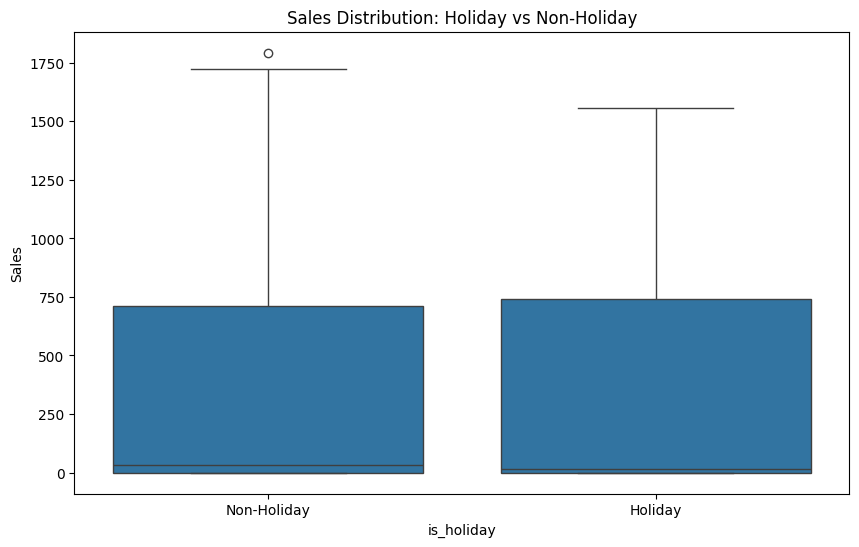

In [26]:

# Visualize sales distribution for holiday vs non-holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='Sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [27]:
# Print summary statistics
print(df.groupby('DayOfWeek')['Sales'].describe())
print("\nHoliday vs Non-Holiday Sales:")
print(df.groupby('is_holiday')['Sales'].describe())

# Print the list of holidays in the dataset
holiday_dates = df[df['is_holiday'] == 1].index.tolist()
print("\nHolidays in the dataset:")
for date in holiday_dates:
    print(f"{date.date()}: {us_holidays.get(date)}")

            count        mean         std  min  25%   50%     75%     max
DayOfWeek                                                                
0          1560.0  318.338462  469.388808  0.0  0.0  34.0  770.50  1639.0
1          1560.0  280.810256  443.543271  0.0  0.0  30.5  291.00  1691.0
2          1560.0  304.339744  462.794149  0.0  0.0  28.0  725.00  1603.0
3          1560.0  284.910897  454.747902  0.0  0.0  23.5  322.25  1793.0
4          1570.0  312.052229  465.506055  0.0  0.0  37.5  742.00  1621.0
5          1570.0  307.989172  469.064582  0.0  0.0  37.5  705.75  1721.0
6          1570.0  321.981529  466.041927  0.0  0.0  43.0  790.00  1697.0

Holiday vs Non-Holiday Sales:
              count        mean         std  min  25%   50%     75%     max
is_holiday                                                                 
0           10540.0  304.158824  461.256830  0.0  0.0  34.0  713.25  1793.0
1             410.0  309.865854  475.748371  0.0  0.0  16.5  742.25  1557.0

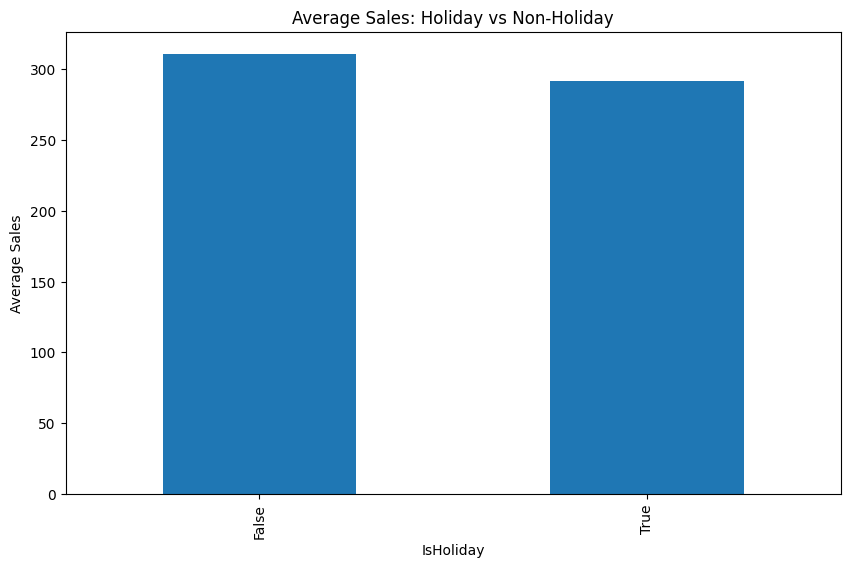

In [28]:
# 8. Checking for holidays effect
df['IsHoliday'] = df['School_Holiday'] | (df.index.month == 12)  # Assuming December is a holiday month
holiday_effect = df.groupby('IsHoliday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.show()


Monthly Average Sales: Promo vs No Promo
          No Promo        Promo
Date                           
2021-01  34.630137   985.362637
2021-02  28.096939   986.630952
2021-03  34.088372   943.115789
2021-04  31.838095   958.077778
2021-05  40.755760  1023.817204
2021-06  36.028037   881.558140
2021-07  40.277512   791.108911
2021-08  32.000000   864.060976
2021-09  38.575893   915.289474
2021-10  29.728111   981.645161
2021-11  30.840580   927.763441
2021-12  34.017937   887.287356
2022-01  40.640553   965.774194
2022-02  34.883495   930.472973
2022-03  29.212264   957.632653
2022-04  27.779817  1078.414634
2022-05  32.724138   921.037383
2022-06  36.848780   883.157895
2022-07  36.201005   850.918919
2022-08  41.195455   831.511111
2022-09  37.809524  1005.522222
2022-10  30.573991   932.310345
2022-11  38.633028   996.231707
2022-12  41.415459   976.174757
2023-01  37.336323   950.333333
2023-02  42.092308   927.435294
2023-03  34.977064   933.402174
2023-04  31.430622   930.802198

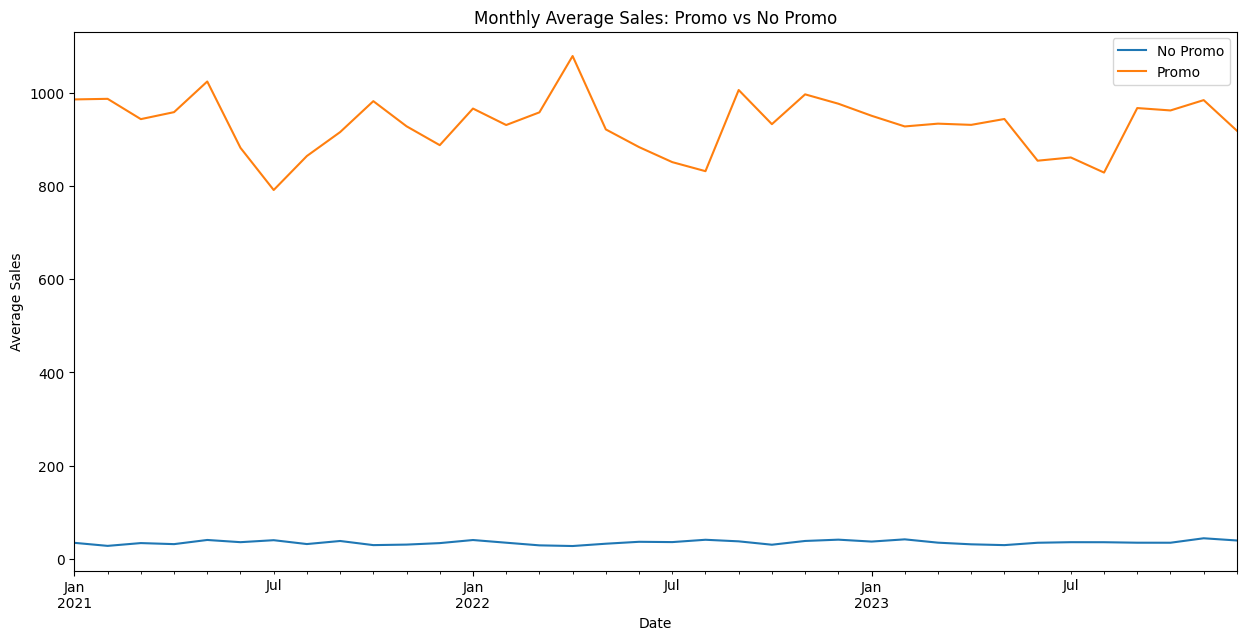

In [29]:
# 9. Promo effect over time
monthly_promo_sales = df.groupby([df.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()

# Rename columns for clarity
monthly_promo_sales.columns = ['No Promo', 'Promo']

# Display the data
print("Monthly Average Sales: Promo vs No Promo")
print(monthly_promo_sales)

# Calculate the difference and percentage increase
monthly_promo_sales['Difference'] = monthly_promo_sales['Promo'] - monthly_promo_sales['No Promo']
monthly_promo_sales['Percentage Increase'] = (monthly_promo_sales['Difference'] / monthly_promo_sales['No Promo']) * 100

print("\nDifference and Percentage Increase:")
print(monthly_promo_sales[['Difference', 'Percentage Increase']])

# Plot
monthly_promo_sales[['No Promo', 'Promo']].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Promo vs No Promo')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['No Promo', 'Promo'])
plt.show()

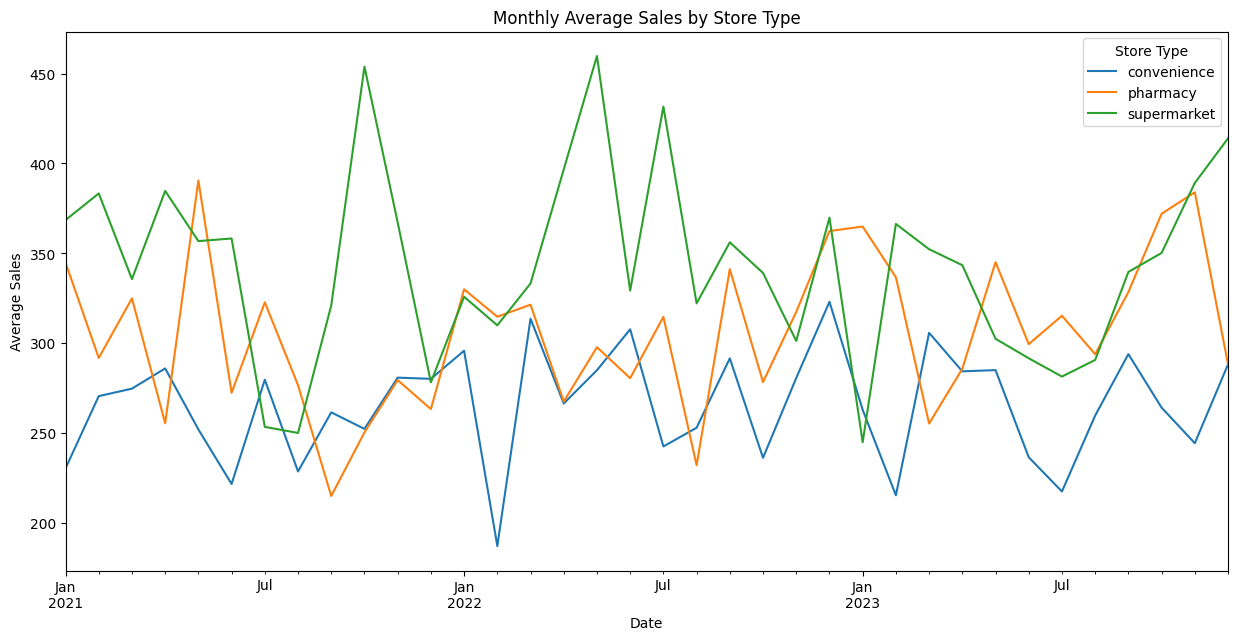

In [30]:
# 10. Store type performance over time
store_type_sales = df.groupby([df.index.to_period('M'), 'Store_Type'])['Sales'].mean().unstack()
store_type_sales.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.show()

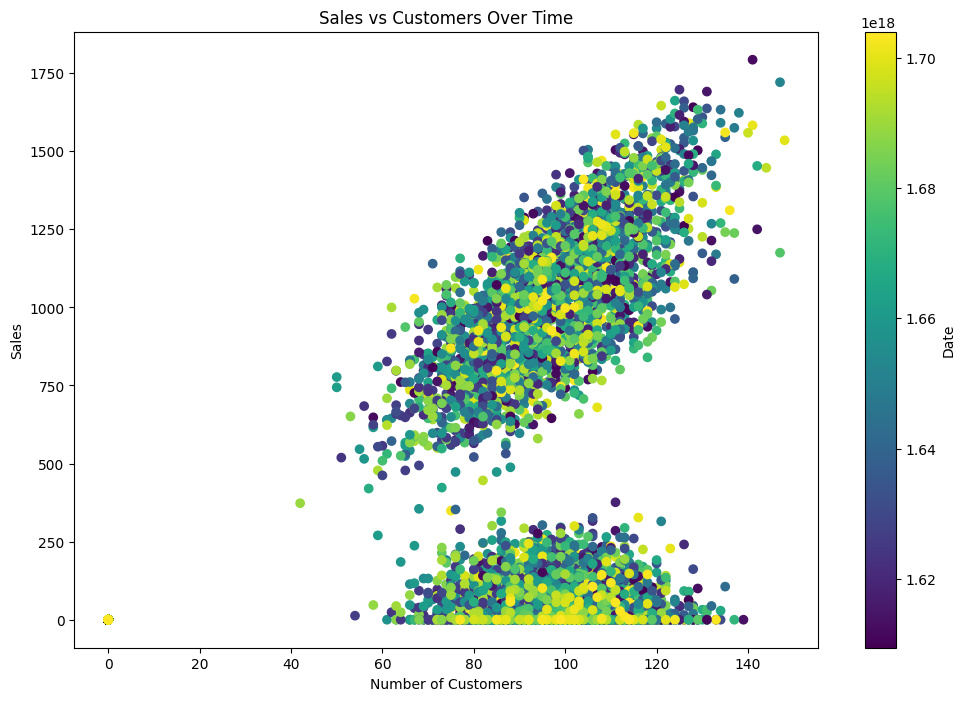

In [31]:
# 12. Sales vs Customers scatter plot with time color gradient
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Customers'], df['Sales'], c=df.index, cmap='viridis')
plt.colorbar(scatter, label='Date')
plt.title('Sales vs Customers Over Time')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

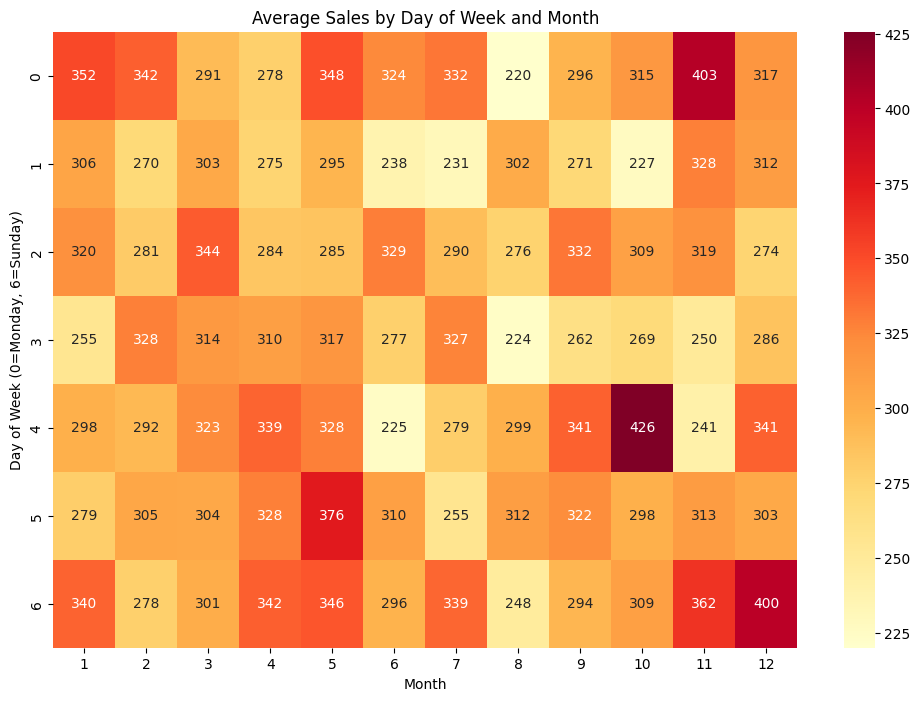

In [32]:
# 13. Heatmap of sales by day of week and month
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
sales_heatmap = df.pivot_table(values='Sales', index='DayOfWeek', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()

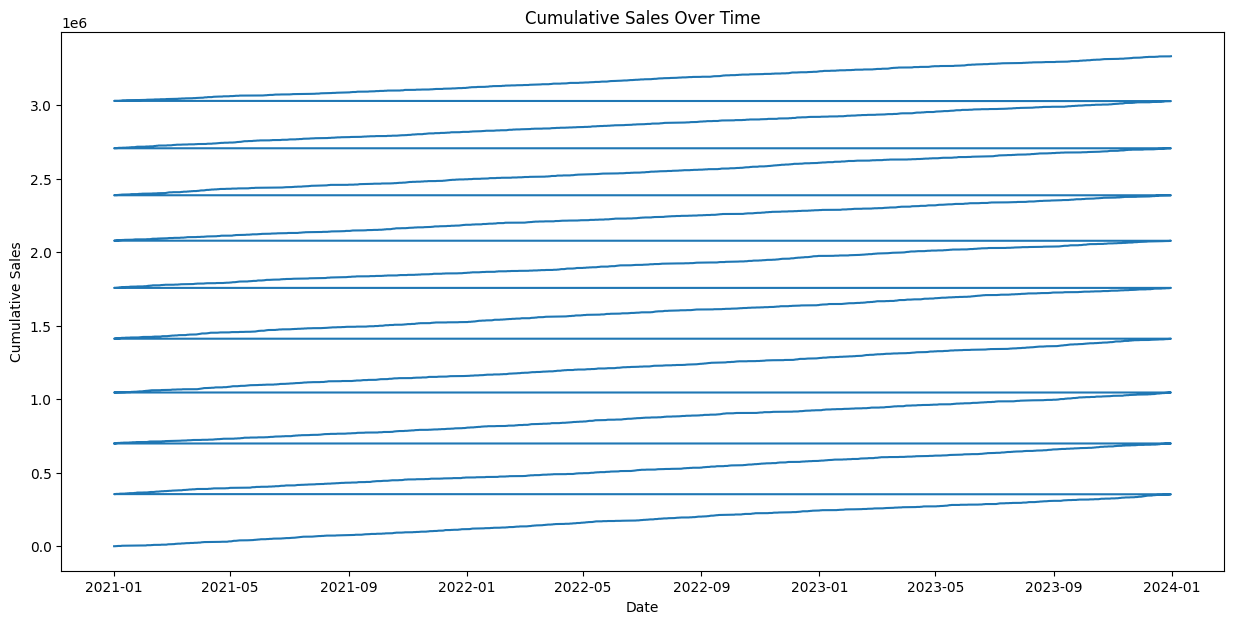

In [33]:
# 14. Cumulative sales
df['CumulativeSales'] = df['Sales'].cumsum()
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['CumulativeSales'])
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.show()

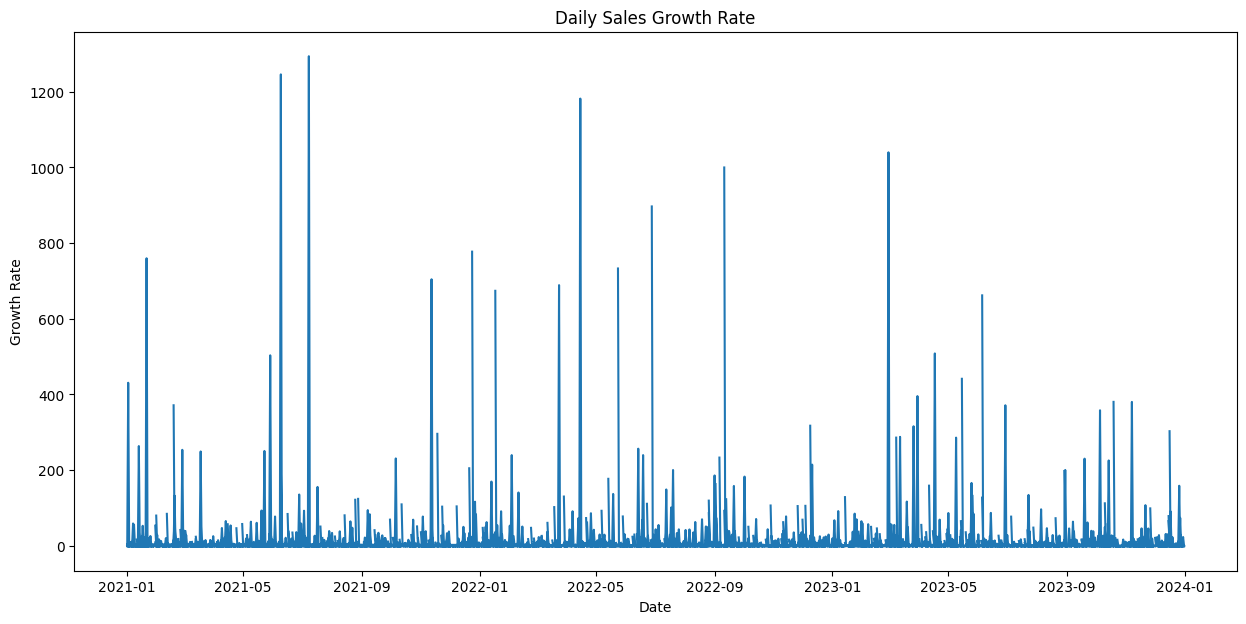

In [34]:
# 15. Sales growth rate
df['SalesGrowthRate'] = df['Sales'].pct_change()
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['SalesGrowthRate'])
plt.title('Daily Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.show()

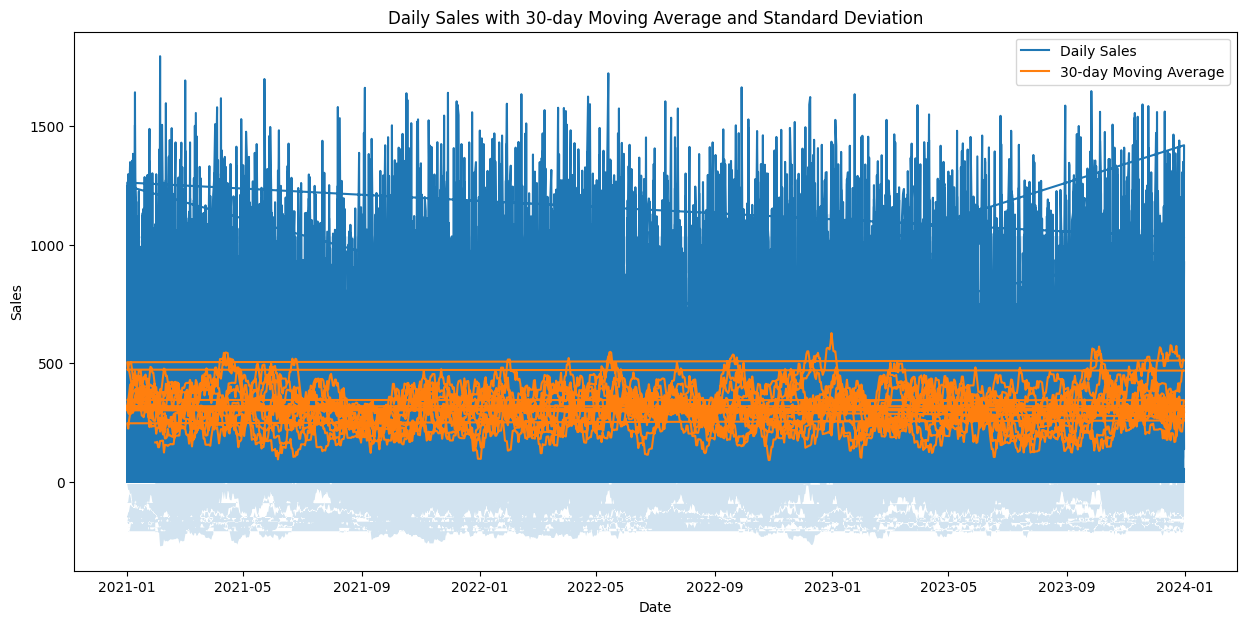

In [35]:
# 16. Moving average and standard deviation
window = 30  # 30-day window
df['MA30'] = df['Sales'].rolling(window=window).mean()
df['SD30'] = df['Sales'].rolling(window=window).std()

plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Sales'], label='Daily Sales')
plt.plot(df.index, df['MA30'], label=f'{window}-day Moving Average')
plt.fill_between(df.index, df['MA30'] - df['SD30'], df['MA30'] + df['SD30'], alpha=0.2)
plt.title(f'Daily Sales with {window}-day Moving Average and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [36]:
features_to_remove = ['MA30', 'SD30', 'SalesGrowthRate','IsHoliday','CumulativeSales']
df_cleaned = df.drop(columns=features_to_remove, errors='ignore')

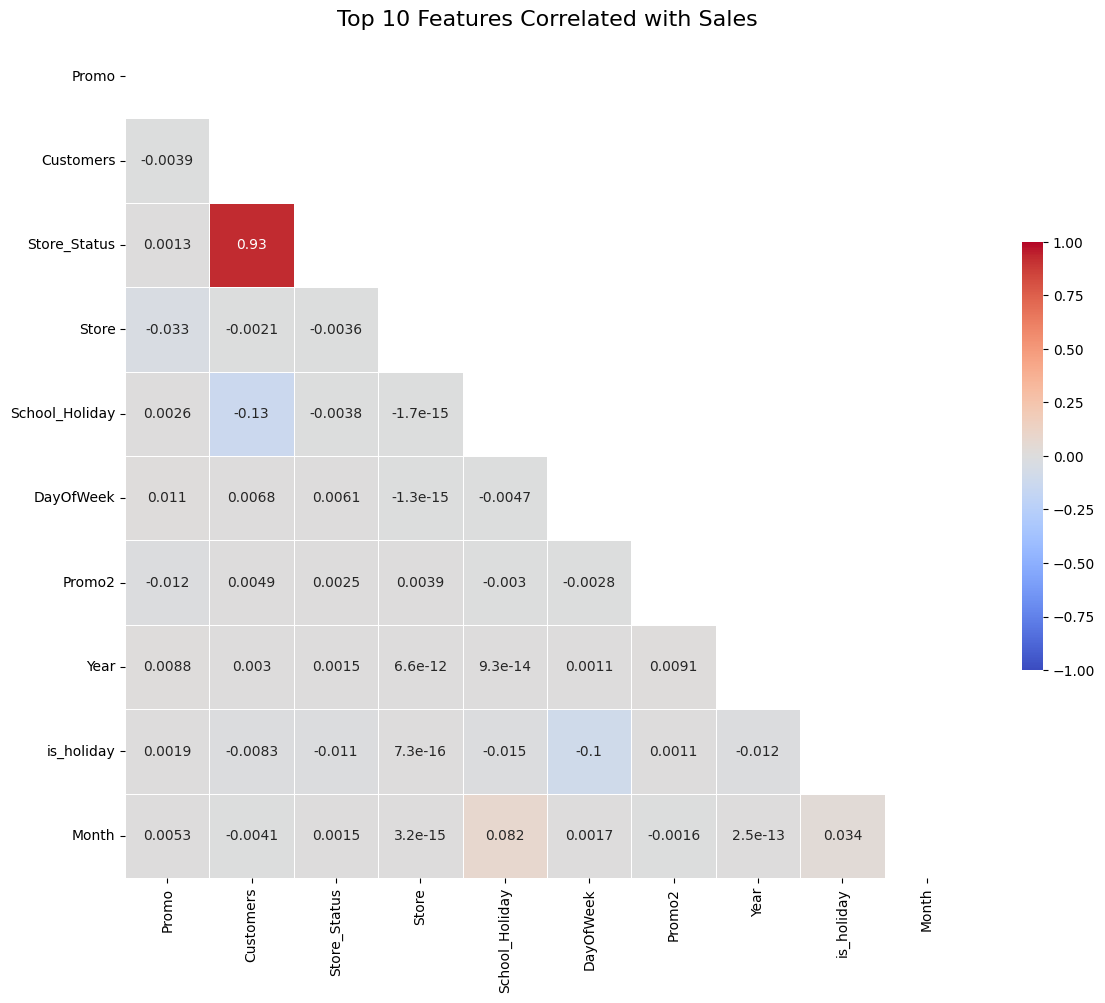

Correlations with Sales:
Promo             0.888812
Customers         0.243039
Store_Status      0.220830
Store             0.032167
School_Holiday    0.027882
DayOfWeek         0.011325
Promo2            0.008017
Year              0.007275
is_holiday        0.002346
Month             0.000853
Name: Sales, dtype: float64


In [37]:
# Assuming df is your DataFrame
# Select numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations
correlations = df_cleaned[numeric_columns].corr()['Sales'].abs().sort_values(ascending=False)

# Select top 10 correlated features (excluding 'Sales' itself)
top_features = correlations[1:11].index.tolist()

# Create correlation matrix for these features
f_correlation = df[top_features].corr()

# Generate a mask for the upper triangle
f_mask = np.triu(np.ones_like(f_correlation, dtype=bool))

# Set up the matplotlib figure
f_fig, f_ax = plt.subplots(figsize=(12, 10))

# Create the heatmap
sns.heatmap(f_correlation, mask=f_mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Top 10 Features Correlated with Sales', fontsize=16)
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations with Sales:")
print(correlations[top_features])


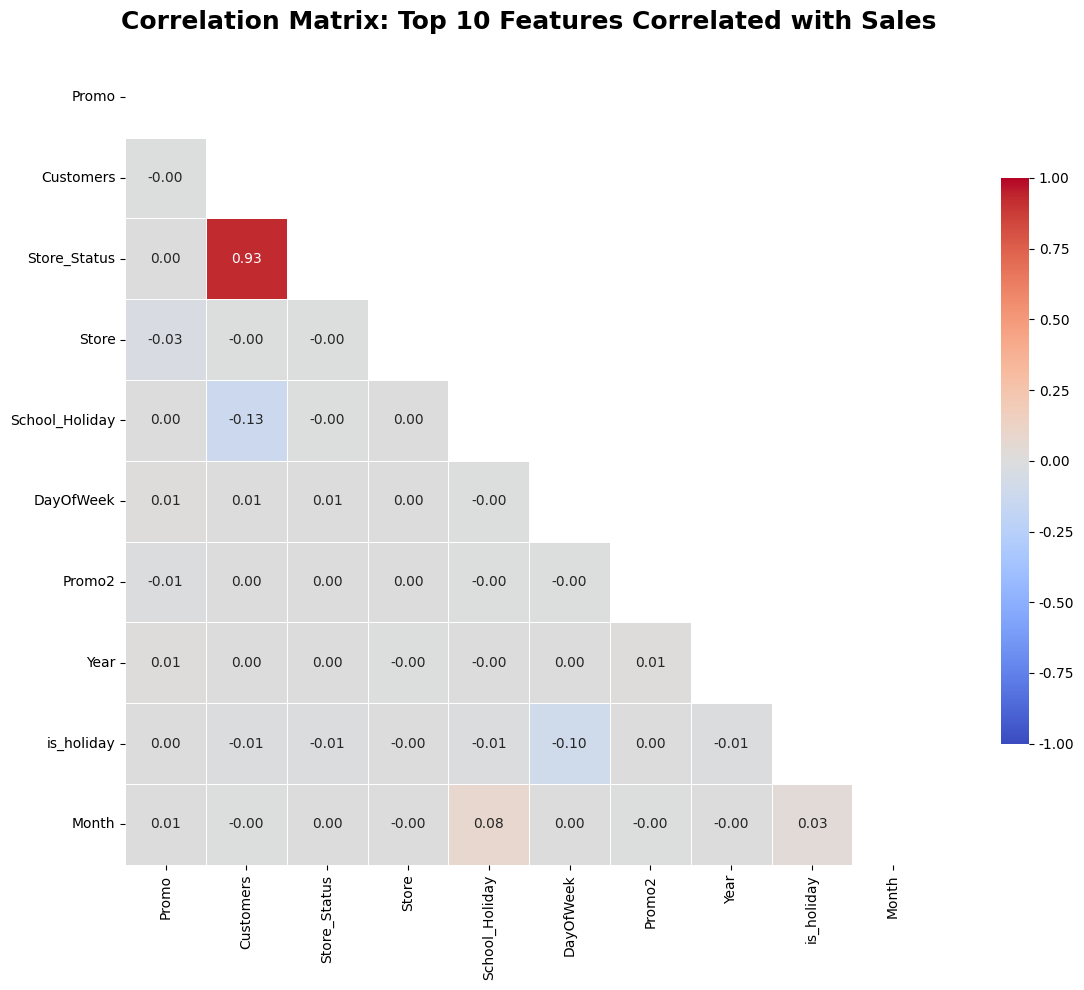

Top Features Correlated with Sales:
                Correlation with Sales
Promo                         0.888812
Customers                     0.243039
Store_Status                  0.220830
Store                         0.032167
School_Holiday                0.027882
DayOfWeek                     0.011325
Promo2                        0.008017
Year                          0.007275
is_holiday                    0.002346
Month                         0.000853


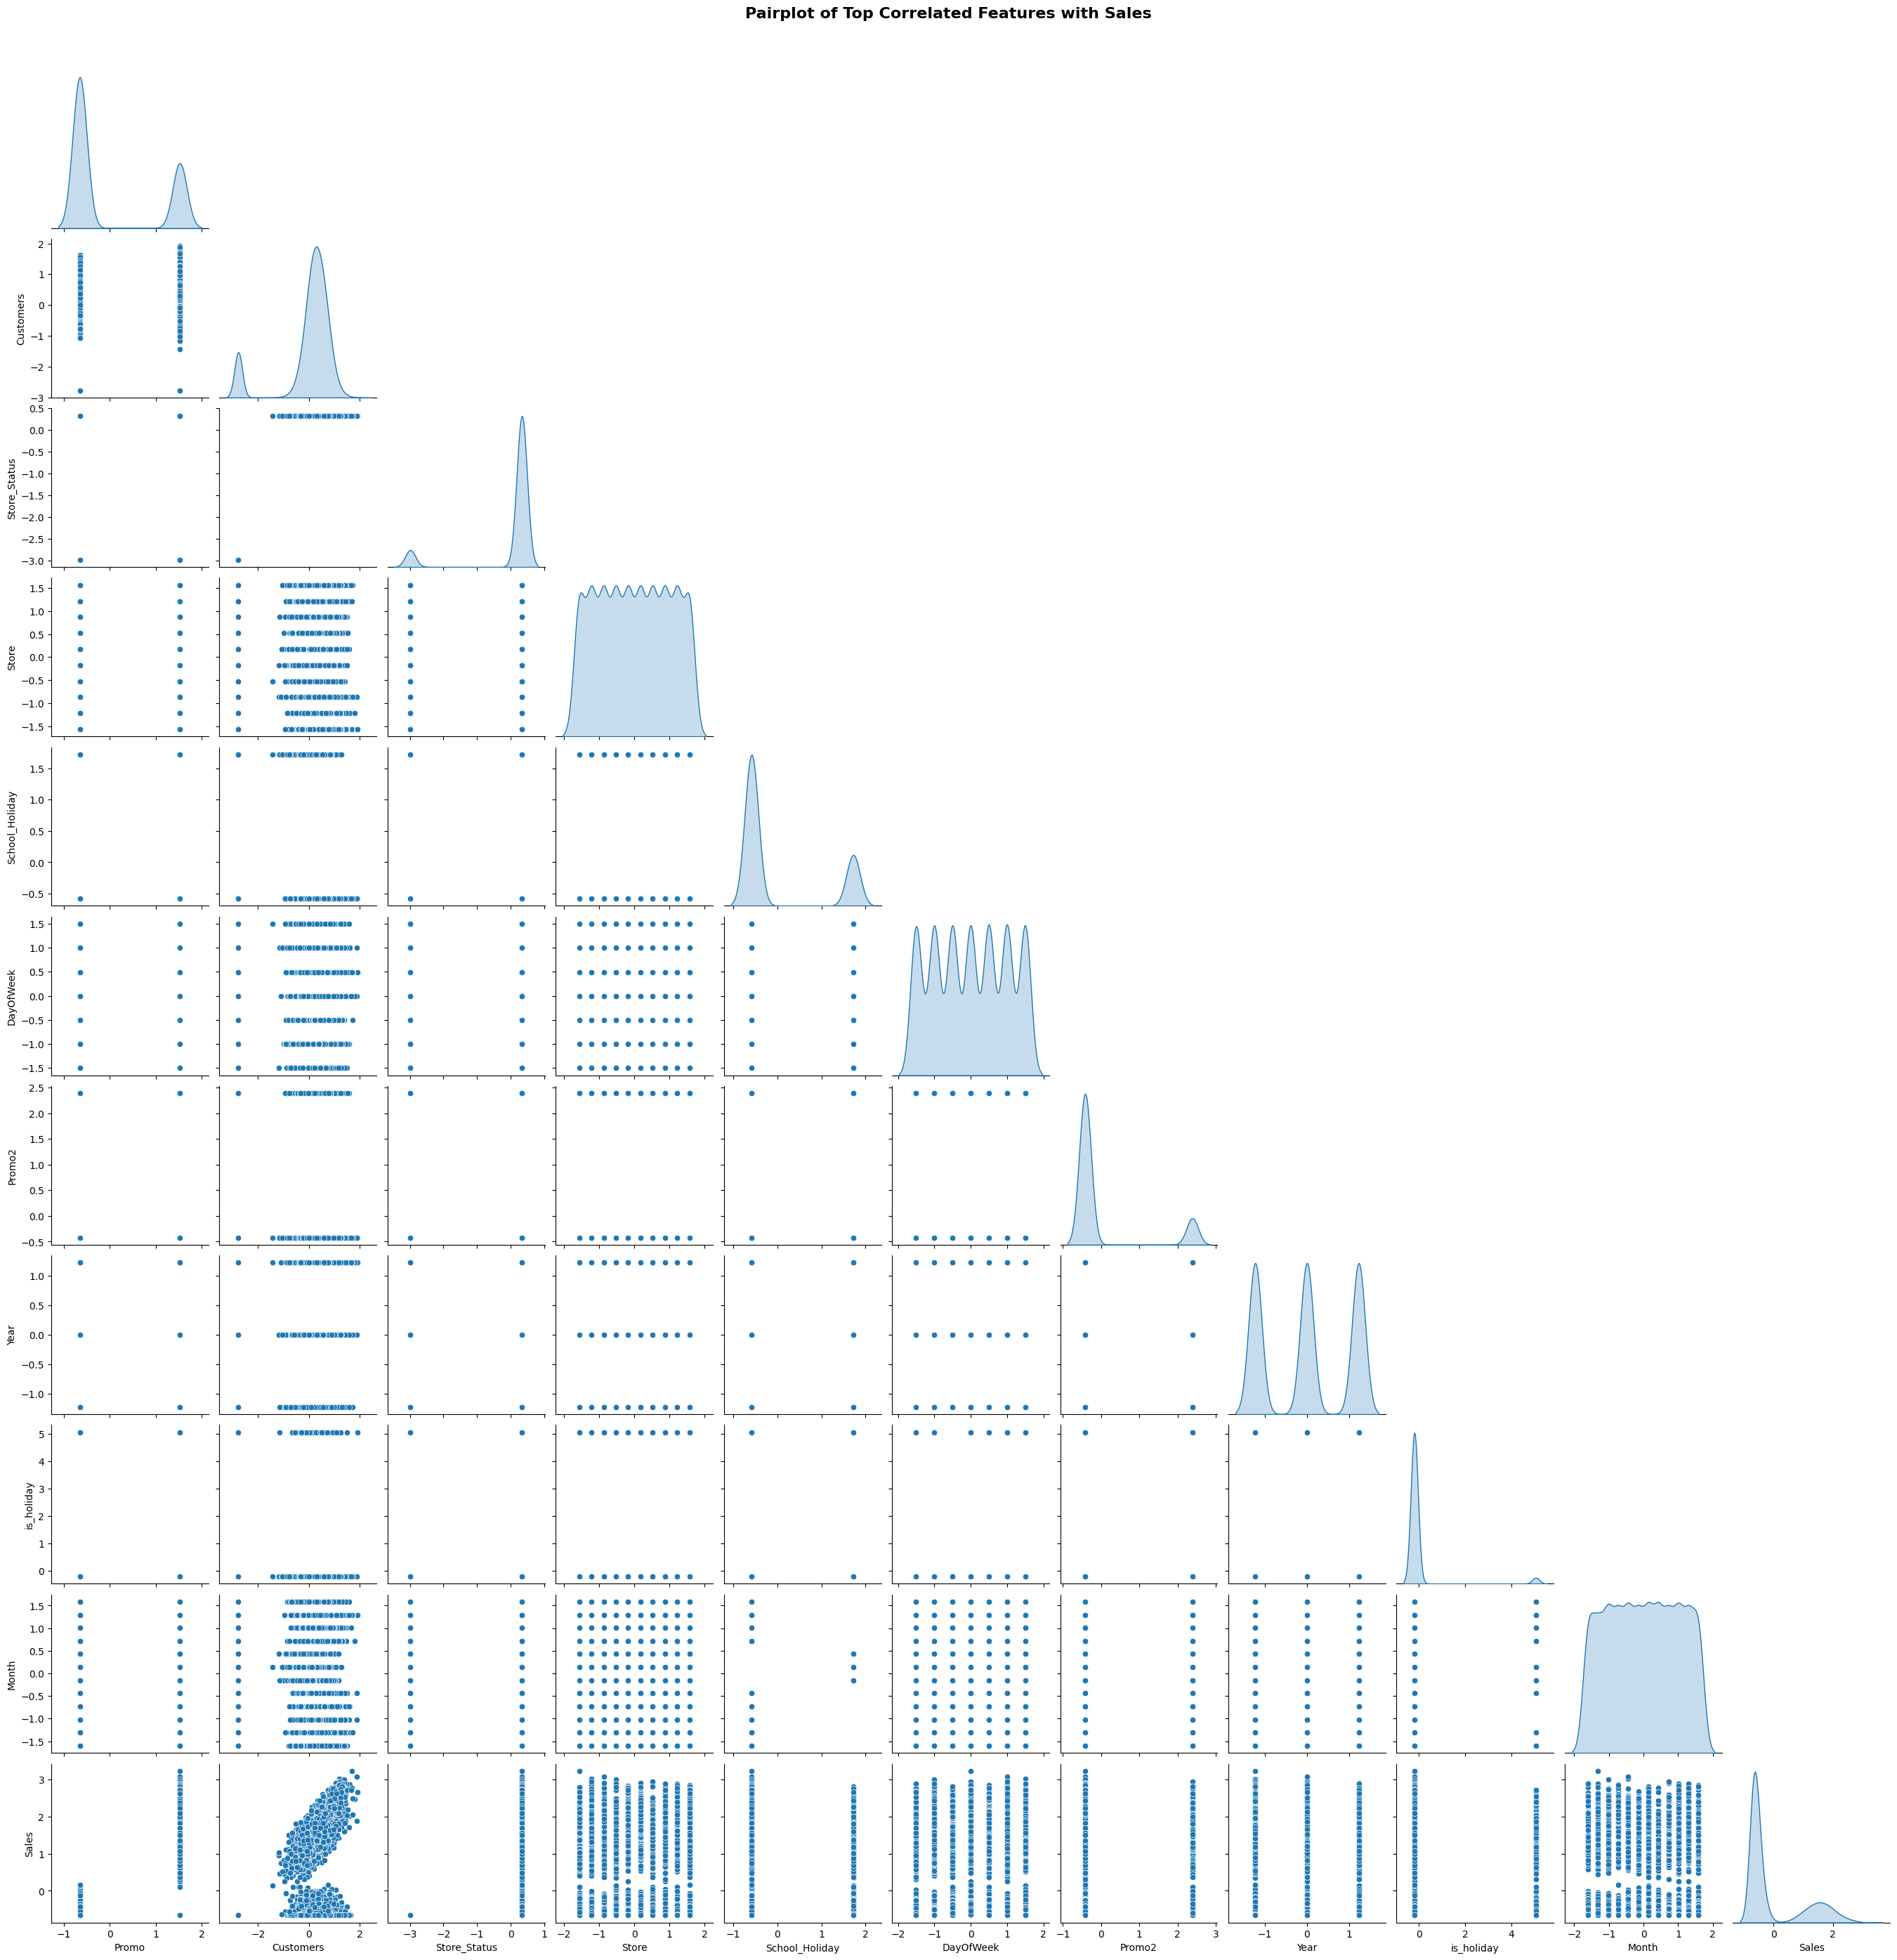

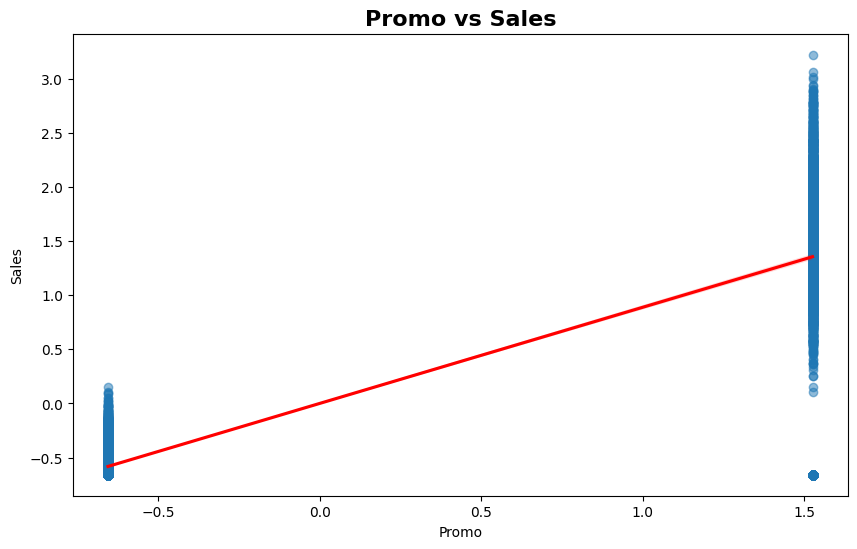

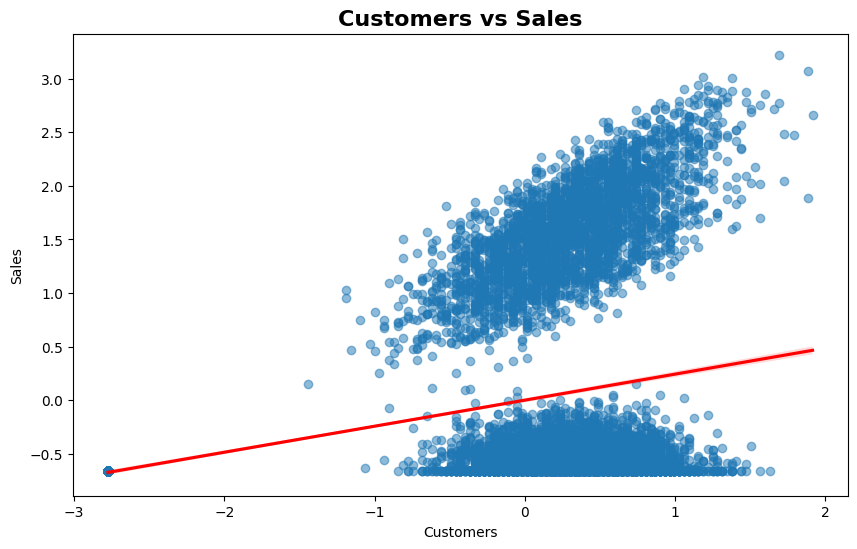

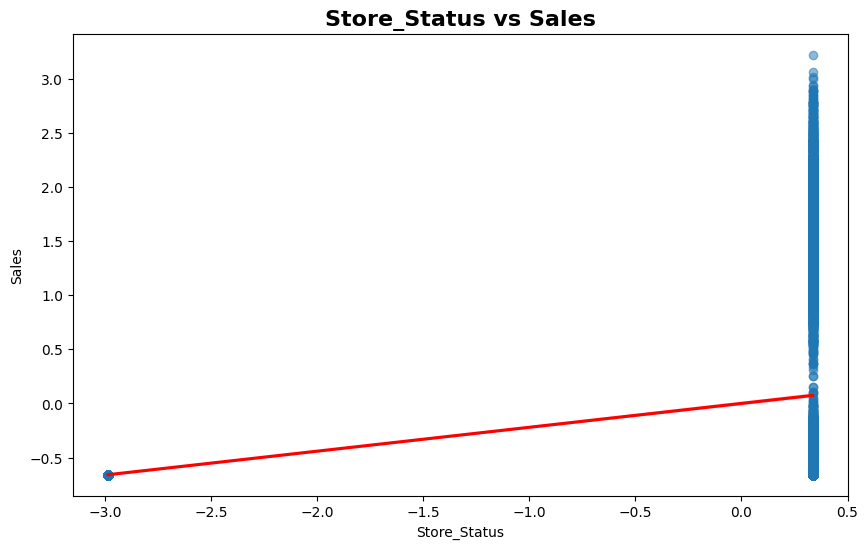

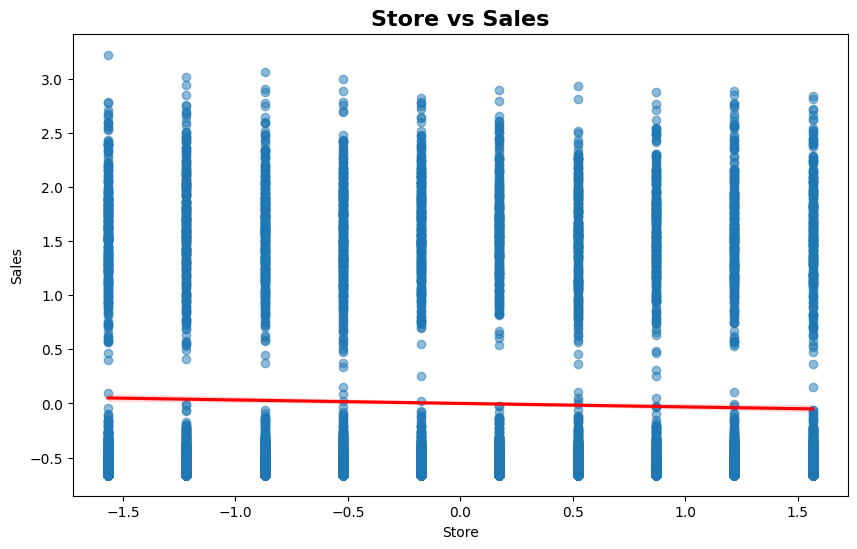

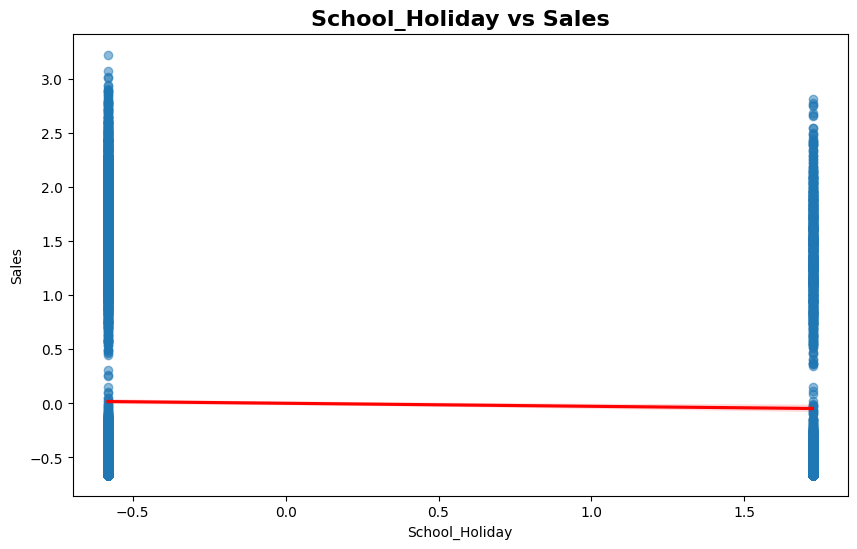

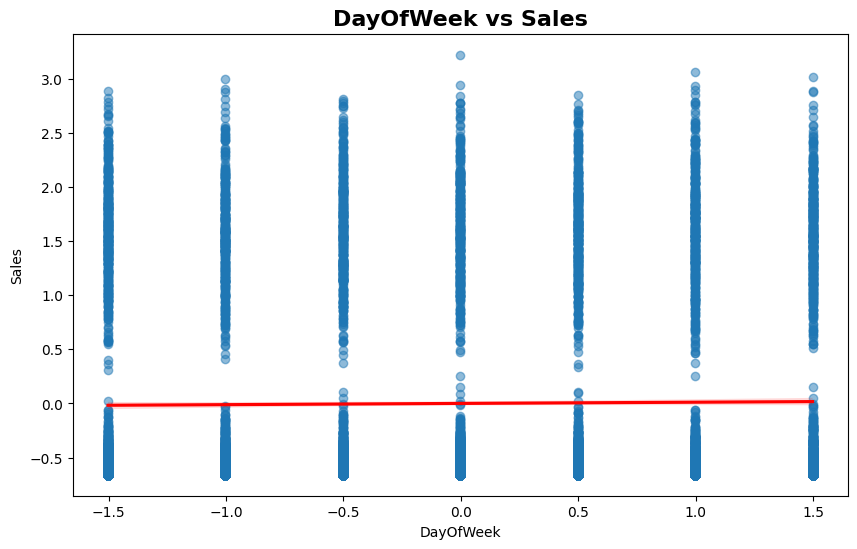

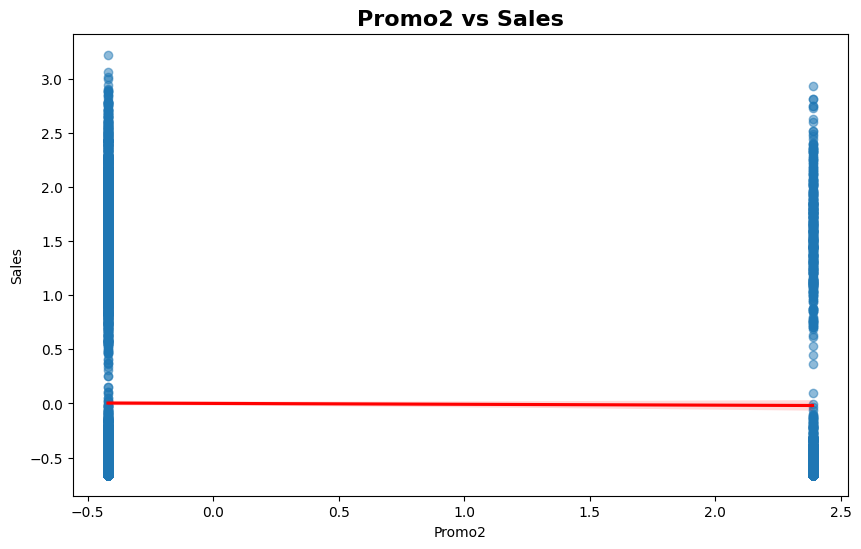

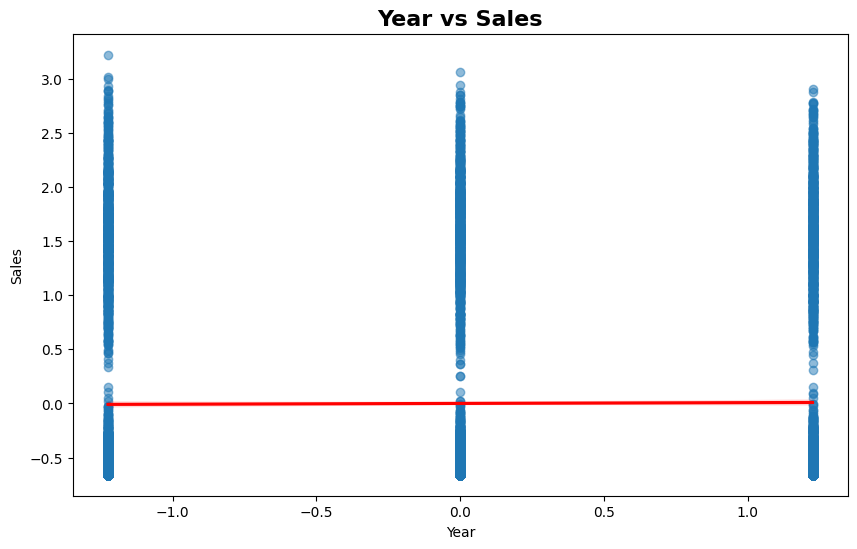

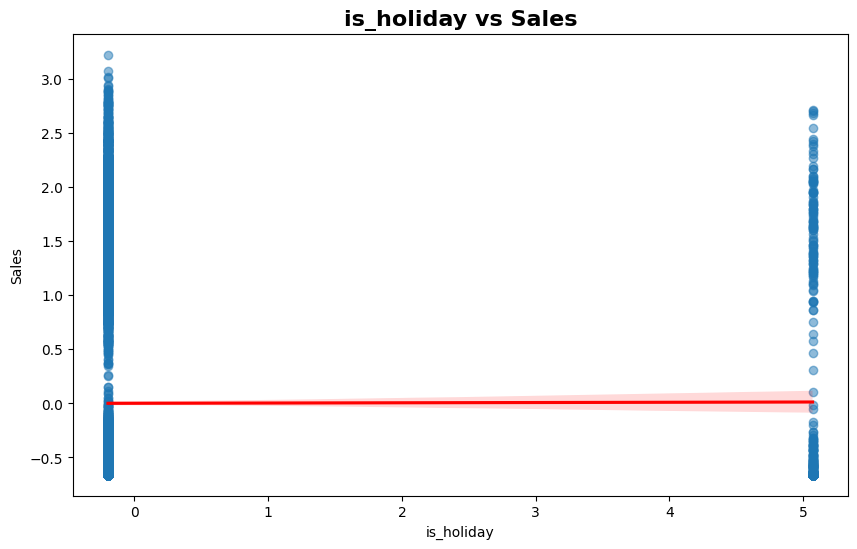

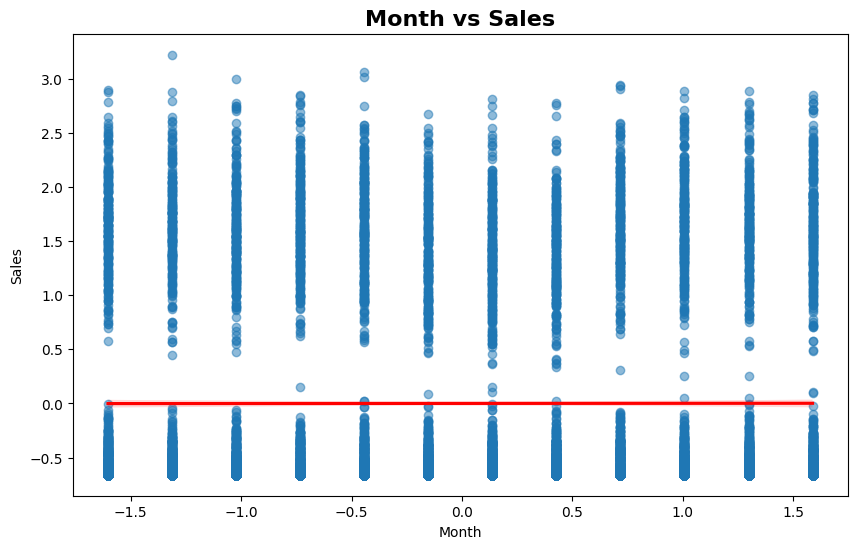

In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your cleaned DataFrame
# Step 1: Select numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Step 2: Standardize the numeric columns (this is optional but helps for scaled comparison)
scaler = StandardScaler()
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Step 3: Calculate correlations
correlations = df_cleaned_scaled[numeric_columns].corr()['Sales'].abs().sort_values(ascending=False)

# Step 4: Select the top 10 most correlated features (excluding 'Sales' itself)
top_features = correlations[1:11].index.tolist()

# Step 5: Create the correlation matrix for the top features
correlation_matrix = df_cleaned_scaled[top_features].corr()

# Step 6: Set up the figure and mask for the heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Step 7: Customize heatmap appearance
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1, 
    center=0, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.7, 'format': '%.2f'}
)

# Step 8: Add a title with a larger font size and format it
plt.title('Correlation Matrix: Top 10 Features Correlated with Sales', fontsize=18, weight='bold', pad=20)

# Step 9: Adjust layout for better spacing
plt.tight_layout()

# Step 10: Display the heatmap
plt.show()

# Step 11: Print out the correlation values in a more structured format
print("Top Features Correlated with Sales:")
correlation_df = pd.DataFrame(correlations[top_features])
correlation_df.columns = ['Correlation with Sales']
print(correlation_df)

# Additional Visualization: Pairplot for deeper insight into feature interactions
sns.pairplot(df_cleaned_scaled[top_features + ['Sales']], diag_kind="kde", corner=True)
plt.suptitle('Pairplot of Top Correlated Features with Sales', y=1.02, fontsize=16, weight='bold')
plt.show()

# Extra: Displaying Distribution of Sales vs Highly Correlated Features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df_cleaned_scaled[feature], y=df_cleaned_scaled['Sales'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{feature} vs Sales', fontsize=16, weight='bold')
    plt.xlabel(f'{feature}')
    plt.ylabel('Sales')
    plt.show()
